# LOB for Signal Recognition
We now try to use the processed lob data to do some analysis. We will first load the processed lob data and then figure out some signals to buy or sell the stock. 

## 1. Read the Data
Because the whole LOB is too large, I will first create a sample dataset which includes the first 3 days of the original data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# laod processed lob
lob_data= pd.read_csv('E:\\Bristol\\mini_project\\JPMorgan_Set01\\test_datasets\\processed_lob_data.csv')
lob_data.head()

,Timestamp,Exchange,Total Bid Quantity,Total Ask Quantity,Max Bid Price,Min Ask Price,Spread,Weighted Avg Bid Price,Weighted Avg Ask Price,Bid-Ask Quantity Ratio,Date
0,1.333,Exch0,6.0,1.0,1.0,800.0,799.0,1.000000,800.0,6.0,2025-01-02
1,1.581,Exch0,6.0,1.0,1.0,799.0,798.0,1.000000,799.0,6.0,2025-01-02
2,1.643,Exch0,6.0,1.0,1.0,798.0,797.0,1.000000,798.0,6.0,2025-01-02
3,1.736,Exch0,7.0,1.0,261.0,798.0,537.0,38.142857,798.0,7.0,2025-01-02
4,1.984,Exch0,7.0,1.0,261.0,797.0,536.0,38.142857,797.0,7.0,2025-01-02


In [3]:
# Combine 'Date' and 'Timestamp' into a datetime, assuming 'Timestamp' is in seconds and 'Date' is already in a compatible format
lob_data['Datetime'] = pd.to_datetime(lob_data['Date']) + pd.to_timedelta(lob_data['Timestamp'], unit='s')

# Set the new 'Datetime' column as the index
lob_data.set_index('Datetime', inplace=True)

# Drop the original 'Timestamp' and 'Date' columns as they are no longer needed
lob_data.drop(['Timestamp', 'Date'], axis=1, inplace=True)

# Show the first few rows of the dataframe to confirm changes
lob_data.head()

# save the processed lob data
# lob_data.to_csv('E:\\Bristol\\mini_project\\JPMorgan_Set01\\test_datasets\\processed_lob_time_converted.csv')

,Exchange,Total Bid Quantity,Total Ask Quantity,Max Bid Price,Min Ask Price,Spread,Weighted Avg Bid Price,Weighted Avg Ask Price,Bid-Ask Quantity Ratio
Datetime,,,,,,,,,
2025-01-02 00:00:01.333,Exch0,6.0,1.0,1.0,800.0,799.0,1.000000,800.0,6.0
2025-01-02 00:00:01.581,Exch0,6.0,1.0,1.0,799.0,798.0,1.000000,799.0,6.0
2025-01-02 00:00:01.643,Exch0,6.0,1.0,1.0,798.0,797.0,1.000000,798.0,6.0
2025-01-02 00:00:01.736,Exch0,7.0,1.0,261.0,798.0,537.0,38.142857,798.0,7.0
2025-01-02 00:00:01.984,Exch0,7.0,1.0,261.0,797.0,536.0,38.142857,797.0,7.0


In [4]:
lob_sample = lob_data['2025-01-02':'2025-01-06']
lob_sample

,Exchange,Total Bid Quantity,Total Ask Quantity,Max Bid Price,Min Ask Price,Spread,Weighted Avg Bid Price,Weighted Avg Ask Price,Bid-Ask Quantity Ratio
Datetime,,,,,,,,,
2025-01-02 00:00:01.333,Exch0,6.0,1.0,1.0,800.0,799.0,1.000000,800.0000,6.0
2025-01-02 00:00:01.581,Exch0,6.0,1.0,1.0,799.0,798.0,1.000000,799.0000,6.0
2025-01-02 00:00:01.643,Exch0,6.0,1.0,1.0,798.0,797.0,1.000000,798.0000,6.0
2025-01-02 00:00:01.736,Exch0,7.0,1.0,261.0,798.0,537.0,38.142857,798.0000,7.0
2025-01-02 00:00:01.984,Exch0,7.0,1.0,261.0,797.0,536.0,38.142857,797.0000,7.0
...,...,...,...,...,...,...,...,...,...
2025-01-06 08:26:23.751,Exch0,40.0,16.0,326.0,328.0,2.0,139.100000,475.8125,2.5
2025-01-06 08:26:23.813,Exch0,40.0,16.0,326.0,328.0,2.0,138.725000,475.8125,2.5
2025-01-06 08:26:24.030,Exch0,40.0,16.0,326.0,328.0,2.0,138.725000,494.0000,2.5


In [5]:
# description of the sample data,set the precision to 2
lob_sample.describe().round(2)
# there are some rows with 1 in max bid price,which is not reasonable. We will remove these rows

,Total Bid Quantity,Total Ask Quantity,Max Bid Price,Min Ask Price,Spread,Weighted Avg Bid Price,Weighted Avg Ask Price,Bid-Ask Quantity Ratio
count,1029919.00,1029919.00,1029919.00,1029919.00,1029919.00,1029919.00,1029919.00,1029919.00
mean,35.96,18.79,294.36,311.52,17.16,230.91,438.20,2.21
std,14.06,6.46,20.64,43.12,40.70,39.25,71.83,1.48
min,1.00,1.00,1.00,243.00,1.00,1.00,255.00,0.03
25%,26.00,14.00,286.00,292.00,3.00,209.47,386.92,1.32
50%,35.00,18.00,294.00,302.00,6.00,236.52,428.71,1.89
75%,45.00,23.00,305.00,319.00,12.00,258.44,478.72,2.68
max,122.00,52.00,346.00,800.00,799.00,336.75,800.00,55.00


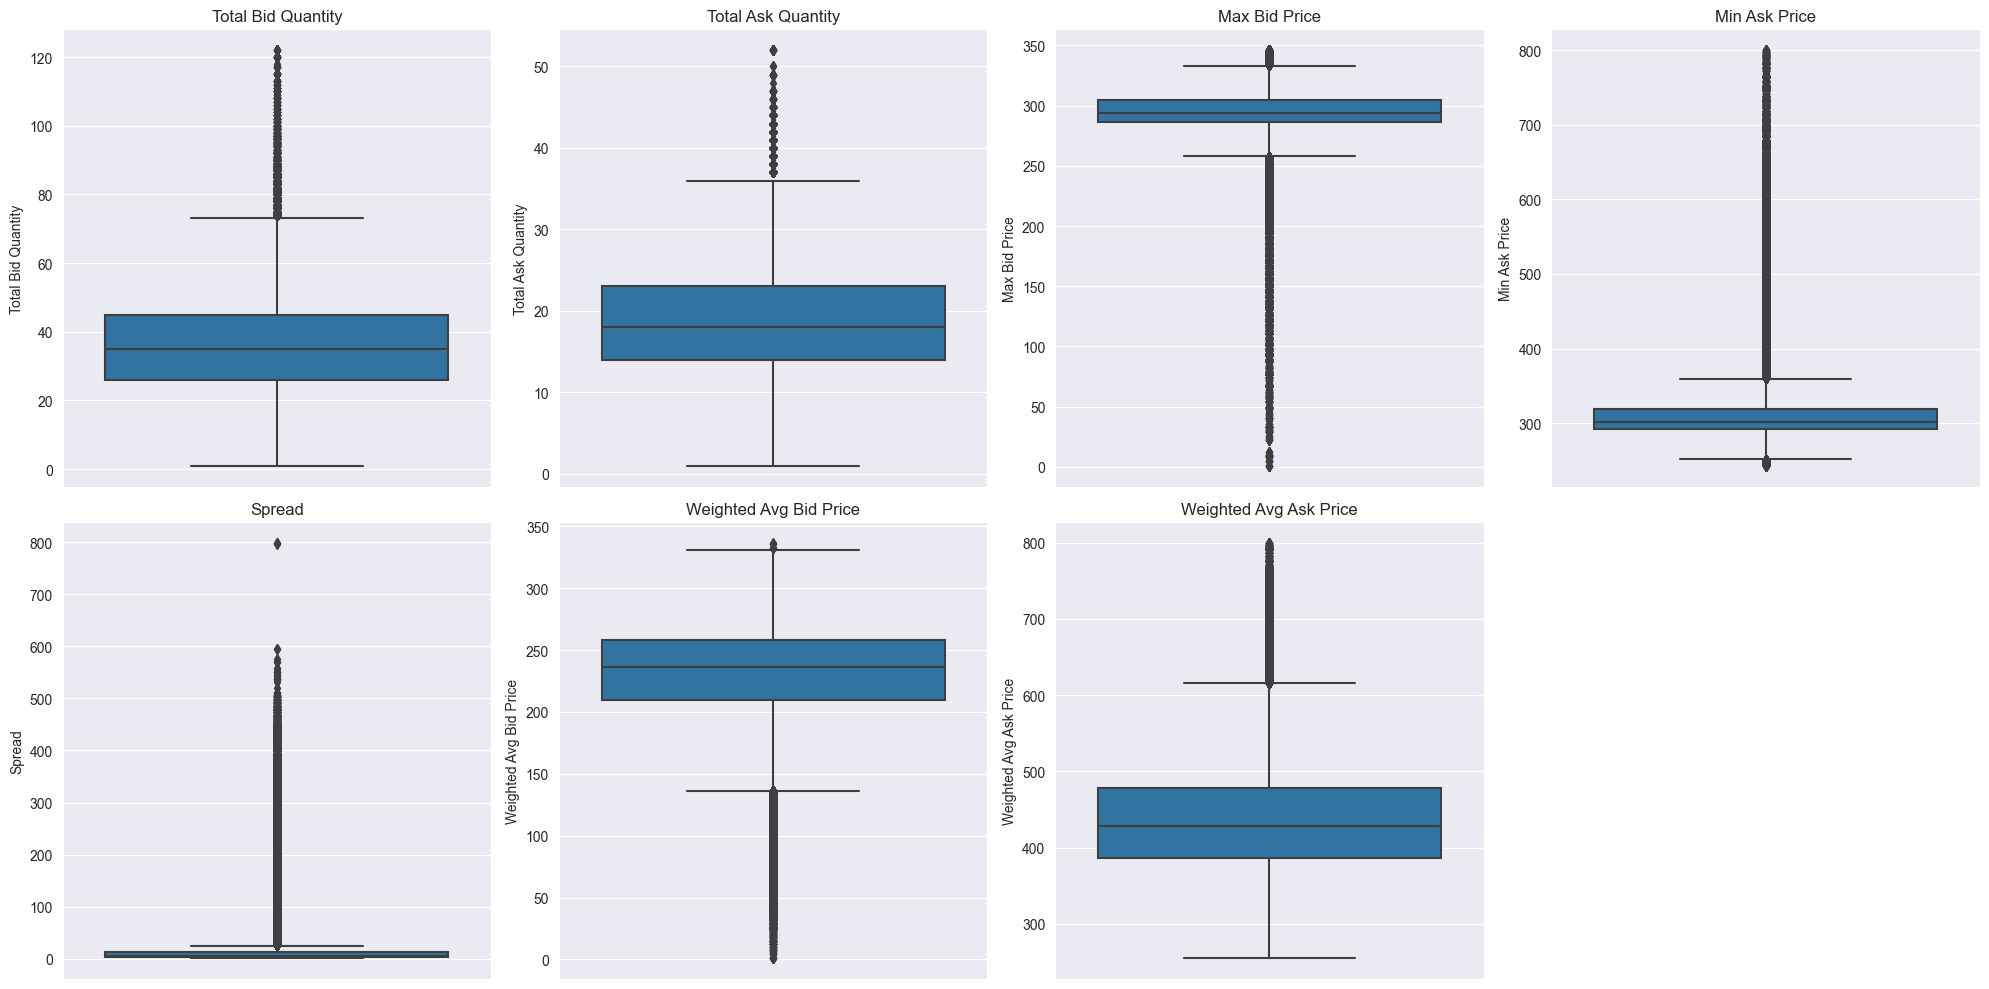

In [6]:
# 绘制箱形图
plt.figure(figsize=(20, 10))
key_columns = ['Total Bid Quantity', 'Total Ask Quantity', 'Max Bid Price', 'Min Ask Price', 'Spread', 'Weighted Avg Bid Price', 'Weighted Avg Ask Price']
for i, column in enumerate(key_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=lob_sample[column])
    plt.title(column)
plt.tight_layout()
plt.show()

### Outliers
We can see from the boxplot, there are a lot of outliers in the data. However, we can not say they are all wrong. I decide to remove those rows which has a max bid price lower than 5% quantile of the max bid price and a min ask price higher than 95% quantile of the min ask price.

But...I looked up some financial information and found that, "The minimum bid price requirement stems from Section 5550(a)(2) of the Nasdaq's Equity Rules guide. It clearly states: "(a) Continued Listing Requirements for Primary Equity Securities: (2) Minimum bid price of at least $1 per share."

So, the max bid price can be 1, and we will not remove those rows that seems to be outliers.

In [7]:
# 计算最大买价和最小卖价的5%和95%分位数
# max_bid_price_5th_quantile = lob_sample['Max Bid Price'].quantile(0.05)
# min_ask_price_95th_quantile = lob_sample['Min Ask Price'].quantile(0.95)
# 
# # 删除最大买价小于5%分位数和最小卖价大于95%分位数的行
# lob_sample = lob_sample[(lob_sample['Max Bid Price'] > max_bid_price_5th_quantile) & (lob_sample['Min Ask Price'] < min_ask_price_95th_quantile)]
# 
# # 显示处理后的数据样本
# lob_sample.describe().round(2)

## 2. Signal Recognition


### Rule Based Trading Signal Recognition
We will design some basic rules for trading signal identification based on the strategies mentioned above. We can start with the Spread strategy and the Order Imbalance strategy.

#### 1. Spread Strategy
The spread is the difference between the Bid Price and the Ask Price. Generally speaking, a smaller spread may mean that the market is liquid and the prices of buyers and sellers are close, which may be a better time to trade.
Suppose we set a threshold, if `Spread` is less than this threshold, we consider it a buy signal; if `Spread` is greater than another threshold, we consider it a sell signal. Due to the lack of specific business background knowledge and historical data analysis, we assume for the time being that the `Spread` threshold for buying is the 25th percentile of the `Spread` in the data sample and the `Spread` threshold for selling is the 75th percentile.


#### 2. Order Imbalance Strategy
Similarly, we can set thresholds to interpret the `Bid-Ask Quantity  Ratio`. If the value of the buy orders in the order book is greater than the value of the sell orders, this may indicate a bullish market sentiment and may be a buy signal. Conversely, if the value of the sell orders is greater than the value of the buy orders, this may be a sell signal.However, we found that most of the ratio are greater than 1, which means the buy orders are greater than the sell orders. So we will set the buy signal when the ratio is greater than 75% quantile of the ratio, and set the sell signal when the ratio is less than 25% quantile of the ratio.

### Next Steps
- **Signal Integration**: In an actual trading strategy, it may be necessary to consider how to integrate these signals. For example, you may require multiple conditions to be met at the same time before executing a trade, or executing a trade when any of the conditions are met.
- **Threshold Adjustment**: The current thresholds are determined based on quartiles of data and may need to be adjusted based on actual trading performance. In practice, backtesting based on historical data may be required to find the optimal threshold setting.
- **Trade Execution  Logic**: In addition to identifying trade signals, you also need to consider the logic of trade execution, such as the size of the trade, the timing of the trade, and so on.
- **PERFORMANCE EVALUATION**: Most importantly, one needs to evaluate the performance of these rule-based strategies on historical data, including key metrics such as return, maximum retracement, Sharpe ratio, and so on.
 
 


In [9]:
# 计算价差（Spread）的25%和75%分位数作为买入和卖出的阈值
spread_buy_threshold = lob_sample['Spread'].quantile(0.25)  # ==3.0
spread_sell_threshold = lob_sample['Spread'].quantile(0.75) # ==12.0

# 应用价差策略和订单不平衡策略
# 为简化起见，这里我们将直接在DataFrame中添加信号列
# "Buy_Signal" 为买入信号，"Sell_Signal" 为卖出信号

# 价差策略
# 买入信号：价差小于买入阈值
# 卖出信号：价差大于卖出阈值
lob_sample['Buy_Signal_Spread'] = (lob_sample['Spread'] < spread_buy_threshold).astype(int)
lob_sample['Sell_Signal_Spread'] = (lob_sample['Spread'] > spread_sell_threshold).astype(int)

# 订单不平衡策略.当ratio>75%分位数时，买入；当ratio<25%分位数时，卖出
lob_sample['Buy_Signal_BidAskRatio'] = (lob_sample['Bid-Ask Quantity Ratio'] > lob_sample['Bid-Ask Quantity Ratio'].quantile(0.75)).astype(int)
lob_sample['Sell_Signal_BidAskRatio'] = (lob_sample['Bid-Ask Quantity Ratio'] < lob_sample['Bid-Ask Quantity Ratio'].quantile(0.25)).astype(int)

# 显示包含信号的数据样本
lob_sample[['Spread', 'Bid-Ask Quantity Ratio', 'Buy_Signal_Spread', 'Sell_Signal_Spread', 'Buy_Signal_BidAskRatio', 'Sell_Signal_BidAskRatio']].head()

C:\Users\yhb\AppData\Local\Temp\ipykernel_1384\267929303.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lob_sample['Buy_Signal_Spread'] = (lob_sample['Spread'] < spread_buy_threshold).astype(int)
C:\Users\yhb\AppData\Local\Temp\ipykernel_1384\267929303.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lob_sample['Sell_Signal_Spread'] = (lob_sample['Spread'] > spread_sell_threshold).astype(int)
C:\Users\yhb\AppData\Local\Temp\ipykernel_1384\267929303.py:16: SettingWithCopyWarning: 
A value is trying

,Spread,Bid-Ask Quantity Ratio,Buy_Signal_Spread,Sell_Signal_Spread,Buy_Signal_BidAskRatio,Sell_Signal_BidAskRatio
Datetime,,,,,,
2025-01-02 00:00:01.333,799.0,6.0,0,1,1,0
2025-01-02 00:00:01.581,798.0,6.0,0,1,1,0
2025-01-02 00:00:01.643,797.0,6.0,0,1,1,0
2025-01-02 00:00:01.736,537.0,7.0,0,1,1,0
2025-01-02 00:00:01.984,536.0,7.0,0,1,1,0


### 3. Large Order Strategy
Large order trades in the market often signal the activity of institutional investors and may influence short-term market trends.
Strategic Signals: Identify market behavior when large orders (exceeding significant multiples of the average order size) are executed. If there is a large number of buy orders, it may be a buy signal; if there is a large number of sell orders, it may be a sell signal.

The mean `Total Ask Quantity` and `Total Bid Quantity` are 18.79 and 35.96, respectively. We will set the buy signal when the `Total Bid Quantity` is greater than 2 times of the mean `Total Bid Quantity`, and set the sell signal when the `Total Ask Quantity` is greater than 2 times of the mean `Total Ask Quantity`.

In [10]:
# Large order buy/sell signal
lob_sample['Buy_Signal_LargeOrder'] = (lob_sample['Total Bid Quantity'] >= 2 * lob_sample['Total Bid Quantity'].mean()).astype(int)
lob_sample['Sell_Signal_LargeOrder'] = (lob_sample['Total Ask Quantity'] >= 2 * lob_sample['Total Ask Quantity'].mean()).astype(int)    

# Display the sample data with signals
lob_sample[['Total Bid Quantity', 'Total Ask Quantity', 'Buy_Signal_LargeOrder', 'Sell_Signal_LargeOrder']].head()

C:\Users\yhb\AppData\Local\Temp\ipykernel_1384\3213622647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lob_sample['Buy_Signal_LargeOrder'] = (lob_sample['Total Bid Quantity'] >= 2 * lob_sample['Total Bid Quantity'].mean()).astype(int)
C:\Users\yhb\AppData\Local\Temp\ipykernel_1384\3213622647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lob_sample['Sell_Signal_LargeOrder'] = (lob_sample['Total Ask Quantity'] >= 2 * lob_sample['Total Ask Quantity'].mean()).astype(int)


,Total Bid Quantity,Total Ask Quantity,Buy_Signal_LargeOrder,Sell_Signal_LargeOrder
Datetime,,,,
2025-01-02 00:00:01.333,6.0,1.0,0,0
2025-01-02 00:00:01.581,6.0,1.0,0,0
2025-01-02 00:00:01.643,6.0,1.0,0,0
2025-01-02 00:00:01.736,7.0,1.0,0,0
2025-01-02 00:00:01.984,7.0,1.0,0,0


### 4. Price Volatility Strategy
High volatility: High volatility means large price movements in a short period of time, which provides opportunities for traders seeking higher returns. In a high volatility environment, traders can take advantage of large price swings to seek higher profits. However, this comes with a higher level of risk, as large price swings can lead to losses.

Low volatility: Low volatility indicates that the market is relatively stable with small price movements. In this case, it may be easier for conservative traders to find solid trading opportunities because the risk is lower. However, the profit potential in a low volatility environment may also be relatively low.

We will calculate some rolling statistics to measure the price volatility, and traders can choose whether to buy or sell based on the volatility level.

The time window size can be adjusted according to the data frequency and trading strategy. For example, if you are a day trader, you may want to use a shorter time window to capture short-term price movements. If you are a long-term investor, you may want to use a longer time window to capture long-term price trends.


In [11]:
# 选择时间窗口大小，例如过去N个时间点 choose the window size, for example, the past N time points
N = 100  # 可以根据您的数据频率和交易策略进行调整 You can adjust it according to your data frequency and trading strategy

# 计算加权平均价格的滚动标准差作为波动率指标 calculate the rolling standard deviation of the weighted average price as a volatility indicator
lob_sample['Weighted_Avg_Price'] = (lob_sample['Weighted Avg Bid Price'] + lob_sample['Weighted Avg Ask Price']) / 2
lob_sample['Price_Volatility'] = lob_sample['Weighted_Avg_Price'].rolling(window=N).std()

lob_sample['Price_Volatility'].describe().round(2)

# lob_sample.to_csv('../datasets/lob_sample_signals.csv')

C:\Users\yhb\AppData\Local\Temp\ipykernel_1384\2286957053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lob_sample['Weighted_Avg_Price'] = (lob_sample['Weighted Avg Bid Price'] + lob_sample['Weighted Avg Ask Price']) / 2
C:\Users\yhb\AppData\Local\Temp\ipykernel_1384\2286957053.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lob_sample['Price_Volatility'] = lob_sample['Weighted_Avg_Price'].rolling(window=N).std()


count    1029820.00
mean          28.06
std           10.57
min            4.13
25%           20.46
50%           26.12
75%           33.73
max           99.31
Name: Price_Volatility, dtype: float64